<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/Toothpaste_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello World Onshape API
This notebook shows how to use Onshape's REST API to create a GIF from an Onshape Assembly. You will use the API to make assemblies move, update the color and opacity of parts, and get a shaded image of the current view of the assembly. [Getting started video linked here](https://www.youtube.com/watch?v=5QCpUdMQbs0).

Befor you get started, you should know a little bit about Onshape and Python.

* Onshape
  * The difference between a Part Studio and an Assembly
  * How to make a part in a Part Studio
  * How to create a mate in an Assembly
* Python
  * What a function is
  * What a for loop is
  * What an array is

You can find a [full library of snippets in this notebook](https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/Onshape_API_Snippets.ipynb) and you can check out [more example notebooks on this page](https://ptc-education.github.io/docs/solutions/onshapedx).

## Set up Onshape client
You will first need to go to the [Onshape Dev Portal](https://dev-portal.onshape.com/) and generate API keys. Select "no enterprise" if your document starts with "cad.onshape.com/...." and the first three options for key access. Then run the cell below to configure the Onshape API Client.

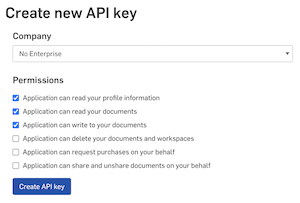

In [ ]:
#@title Import and Setup Onshape Client

!pip install onshape-client
from onshape_client.client import Client
from onshape_client.onshape_url import OnshapeElement
import json

#@markdown Change the base if using an enterprise (i.e. "https://ptc.onshape.com")
base = 'https://rogers.onshape.com' #@param {type:"string"}

#@markdown Would you like to import your API keys from a file, or copy and paste them directly?
keyImportOption = "Copy/Paste Keys" #@param ["Upload Keys from File", "Copy/Paste Keys"]

from IPython.display import clear_output 
clear_output()
print("Onshape Client successfully imported!")

if keyImportOption == "Upload Keys from File":
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    execfile(fn)

  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')
else:
  access = input("Paste your Onshape Access Key: ")
  secret = input("Paste your Onshape Secret Key: ")
  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')


Onshape client configured - ready to go!


# Create toothpaste tube model

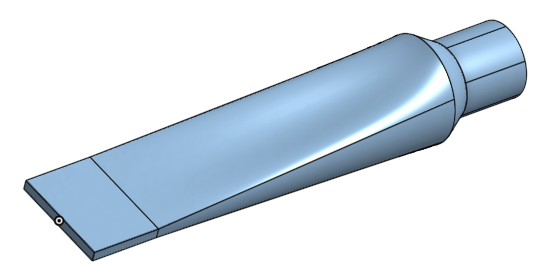


* Start by modeling the toothpaste tube
* Use a shell feature to hollow out the toothepaste tube
* Create a new part that defines the inner volume of the hollowed out tube
* Use a configuration variable to define the squeeze distance
* Use the [Measurements and Variables custom feature](https://cad.onshape.com/documents/78aa66ffe6f1daceb9cfad3d/v/46b98c747ea12e0f0d7cb35c/e/1ec09e0e6fb8aa4f8ff957b1) to measure the surface area of the inner volume



# Define functions for Onshape

In [ ]:
#@title Get Parts in Part Studio
#@markdown Defines function `getPartsInPartStudio(url: str)` returns JSON of all parts in a part studio
url = 'https://rogers.onshape.com/documents/6981b10c1503d0391f5c9ea5/w/85f486980cbdff4ca4f6da28/e/d883eccebdf5f13a403524d5?aa=true' #@param {type:"string"}
showResponse = False #@param {type:"boolean"}
listParts = True #@param {type:"boolean"}
def getPartsInPartStudio(url: str):
  fixed_url = '/api/parts/d/did/w/wid/e/eid/'

  element = OnshapeElement(url)
  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  method = 'GET'

  params = {}
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  # The command below prints the entire JSON response from Onshape
  # print(json.dumps(parsed, indent=4, sort_keys=True))
  return parsed

partResponse = getPartsInPartStudio(url)
if showResponse:
  print(json.dumps(partResponse, indent=4, sort_keys=True))
if listParts:
  for i in range(len(partResponse)):
    print(partResponse[i]["name"] +" has part ID: "+ partResponse[i]["partId"])
else:
  pass

Tube has part ID: JKD
Inside Volume has part ID: JZH


In [ ]:
#@title Get Mass Properties of Parts in a Part Studio
#@markdown Defines function `getMassProp(url: str, partId="", config="")`, which returns JSON of mass properties for all parts in a part studio
url = 'https://rogers.onshape.com/documents/6981b10c1503d0391f5c9ea5/w/85f486980cbdff4ca4f6da28/e/d883eccebdf5f13a403524d5' #@param {type:"string"}
config = 'squeezeDistance%3D0.01%2Bmeter' #@param {type:"string"}
partId = 'JZH' #@param {type:"string"}
showResponse = True #@param {type:"boolean"}

def getMassProp(url: str, partId="", config=""):
  fixed_url = '/api/partstudios/d/did/w/wid/e/eid/massproperties'
  element = OnshapeElement(url)
  method = 'GET'

  params = {}
  if partId != "":
    params['partId'] = partId
  if config != "":
    params['configuration'] = config
    
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v2+json; charset=UTF-8;qs=0.1',
            'Content-Type': 'application/json'}

  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)
  return parsed
if showResponse:
  massProp = getMassProp(url,partId,config)
  print(json.dumps(massProp, indent=4, sort_keys=True))
else:
  pass

In [ ]:
#@title Get Variables from Part Studio
#@markdown Defines function `getVariables(url, config)`, which returns JSON of mass properties for all parts in a part studio

url = 'https://rogers.onshape.com/documents/6981b10c1503d0391f5c9ea5/w/85f486980cbdff4ca4f6da28/e/d883eccebdf5f13a403524d5' #@param {type:"string"}
config = 'squeezeDistance%3D0.01%2Bmeter' #@param {type:"string"}

#@markdown Input a variable name to get value for input variable name with function `getVariableValue(url,config,varName)`.
varName = 'surfaceArea' #@param {type:"string"}

# USING (MODIFIED) CODE FROM https://github.com/onshape-public/onshape-clients/blob/master/python/test/test_get_variables.py

import json

from onshape_client.oas import BTFeatureScriptEvalCall2377
from onshape_client.onshape_url import OnshapeElement
from onshape_client.utility import parse_quantity

script = r'''
    function(context, queries) {
            return getAllVariables(context);
        }
    '''
def getVariables(url, config):
    element = OnshapeElement(url)
    script_call = BTFeatureScriptEvalCall2377(script=script)
    response = client.part_studios_api.eval_feature_script(
        element.did,
        element.wvm,
        element.wvmid,
        element.eid,
        bt_feature_script_eval_call_2377=script_call,
        _preload_content=False,
        configuration=config
    )
    measurements = json.loads(response.data.decode("utf-8"))["result"]["message"]["value"]
    parsed_measurements = parse_variables_from_map(measurements)  
    vars = []
    for name, val in parsed_measurements.items():
        vars.append({name:val})
    return vars

def parse_variables_from_map(unparsed):
    parsed_variables = {}
    value = None
    for to_parse in unparsed:
        if is_fs_type(to_parse, "BTFSValueMapEntry"):
            key = to_parse["message"]["key"]["message"]["value"]
            candidate_message = to_parse["message"]["value"]
            if is_fs_type(candidate_message, ["BTFSValueMap", "BTFSValueArray"]):
                value = parse_variables_from_map(candidate_message["message"]["value"])
            elif is_fs_type(candidate_message, "BTFSValueWithUnits"):
                value = parse_quantity(candidate_message["message"])
            parsed_variables[key] = value
    return parsed_variables

def is_fs_type(candidate, type_name):
    result = False
    try:
        if isinstance(type_name, str):
            result = type_name == candidate["typeName"]
        elif isinstance(type_name, list):
            result = any(
                [type_name_one == candidate["typeName"] for type_name_one in type_name]
            )
    except Exception:
        result = False
    return result

def getVariableValue(url,config,varName):
  vars = getVariables(url,config)
  for x in vars:
    if varName in x:
      return(x[varName])

print(getVariableValue(url,config,varName))


0.013186701694963615*meter**2


# Run analysis scripts

This script gets the volume of the remaining toothpaste per linear squeeze distance and calculates the slope.

[6.040546862628986e-05, 5.250538426554763e-05, 4.456427212220821e-05, 3.655677601497034e-05, 2.8421911623777224e-05]
slope = -0.0007103619756053561 squeeze distance / volume


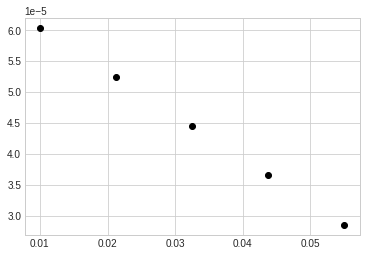

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

url = "https://rogers.onshape.com/documents/6981b10c1503d0391f5c9ea5/w/85f486980cbdff4ca4f6da28/e/d883eccebdf5f13a403524d5"

squeezeDistances = np.linspace(0.01,0.055,5)
configDef = 'squeezeDistance%3D{}%2Bmeter'
volumes = []
for x in squeezeDistances:
  try:
    configuration = configDef.format(str(x))
    massProp = getMassProp(url,"JZH",configuration)
    volumes.append(massProp['bodies']['-all-']['volume'][0])
  except:
    print(x)
    print('error')

plt.plot(squeezeDistances, volumes, 'o', color='black');

x = np.array(squeezeDistances)
y = np.array(volumes)
X = x - x.mean()
Y = y - y.mean()

slope = (X.dot(Y)) / (X.dot(X))
print("slope = "+str(slope)+" squeeze distance / volume")


This script plots the inverse of the surface area of the toothpaste volume, showing what the theoretical pressure on the remaining toothpaste would be as the tube is squeezed out.

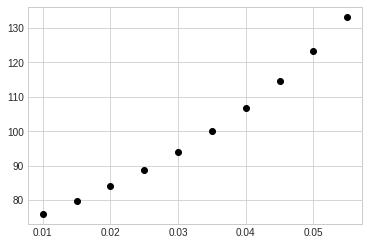

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

url = "https://rogers.onshape.com/documents/6981b10c1503d0391f5c9ea5/w/85f486980cbdff4ca4f6da28/e/d883eccebdf5f13a403524d5"

squeezeDistances = np.linspace(0.01,0.055,10)
configDef = 'squeezeDistance%3D{}%2Bmeter'
surfaceArea = []
PSI = []
for x in squeezeDistances:
  try:
    configuration = configDef.format(str(x))
    value = float(getVariableValue(url,configuration,"surfaceArea").strip("*meter**2"))
    surfaceArea.append(value)
    PSI.append(1/value)
  except:
    print(x)
    print('error')

plt.plot(squeezeDistances, PSI, 'o', color='black');
